In [17]:
# Program 1

# Program to implement the Candidate Elimination Algorithm

import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("Training.csv")
print("Dataset:\n", data)

# Extract features and target
concepts = np.array(data.iloc[:, :-1])
target = np.array(data.iloc[:, -1])


def candidate_elimination(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for _ in range(len(specific_h))]
                 for _ in range(len(specific_h))]

    print("\nInitialization of specific_h and general_h:")
    print("Specific_h:", specific_h)
    print("General_h:", general_h)

    for i, example in enumerate(concepts):
        print(f"\nStep {i + 1}:")
        if target[i] == "Yes":
            for j in range(len(specific_h)):
                if example[j] != specific_h[j]:
                    specific_h[j] = "?"
                    general_h[j][j] = "?"
        else:
            for j in range(len(specific_h)):
                general_h[j][j] = specific_h[j] if example[j] != specific_h[j] else "?"

        print("Specific_h:", specific_h)
        print("General_h:", general_h)

    general_h = [g for g in general_h if any(attr != "?" for attr in g)]
    return specific_h, general_h


# Execute the algorithm
specific_h, general_h = candidate_elimination(concepts, target)
print("\nFinal Specific_h:", specific_h)
print("Final General_h:", general_h)

Dataset:
       Sky Airtemp Humidity    Wind Water Forecast WaterSport
0   Sunny    Warm   Normal  Strong  Warm     Same        Yes
1   Sunny    Warm     High  Strong  Warm     Same        Yes
2  Cloudy    Cold     High  Strong  Warm   Change         No
3   Sunny    Warm     High  Strong  Cool   Change        Yes

Initialization of specific_h and general_h:
Specific_h: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
General_h: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 1:
Specific_h: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
General_h: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2:
Specific_h: ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
General_h: [['?', '?', '?', '?', '?'

In [ ]:
# Program 2
# Program to find a path in a grid using BFS

def find_path(grid, start, goal):
    rows = len(grid)
    cols = len(grid[0])
    queue = [(start, [start])]
    visited = {start}

    # Right, Left, Down, Up
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    while queue:
        (x, y), path = queue.pop(0)

        if (x, y) == goal:
            return path

        for dx, dy in directions:
            new_x = x + dx
            new_y = y + dy
            new_pos = (new_x, new_y)

            if (0 <= new_x < rows and
                0 <= new_y < cols and
                grid[new_x][new_y] == 0 and
                    new_pos not in visited):

                queue.append((new_pos, path + [new_pos]))
                visited.add(new_pos)

    return None

# Example grid and usage
grid = [
    [0, 1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0, 1],
    [0, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 0]
]

start = (0, 0)
goal = (5, 5)

path = find_path(grid, start, goal)
print("Path:", path)

Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5)]


Slope (m): 0.9987762237762237
Intercept (b): 0.09545454545454746


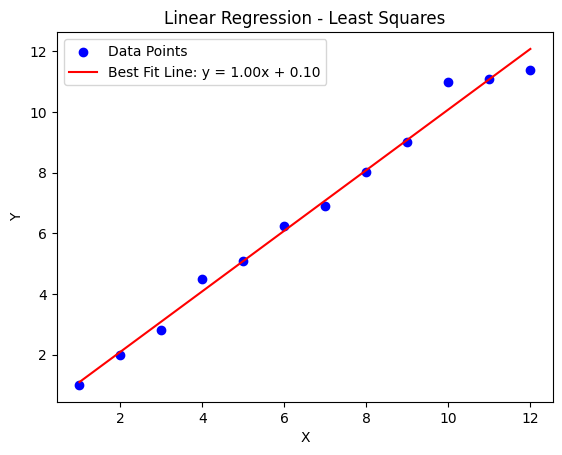

In [ ]:
# Program 3
# Program to implement linear regression using the least squares method

import numpy as np
import matplotlib.pyplot as plt

# Simple function to do linear regression


def linear_regression(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    num = np.sum((x - mean_x) * (y - mean_y))
    den = np.sum((x - mean_x) ** 2)

    m = num / den
    b = mean_y - m * mean_x

    return m, b


# Example data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([1, 2, 2.8, 4.5, 5.1, 6.23, 6.9, 8.01, 9.01, 11, 11.1, 11.4])

# Get the best-fit line
m, b = linear_regression(x, y)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Get predicted y values
y_pred = m * x + b

# Plot
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red',
         label=f'Best Fit Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression - Least Squares')
plt.legend()
plt.show()

ACCURACY: 100.00%

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



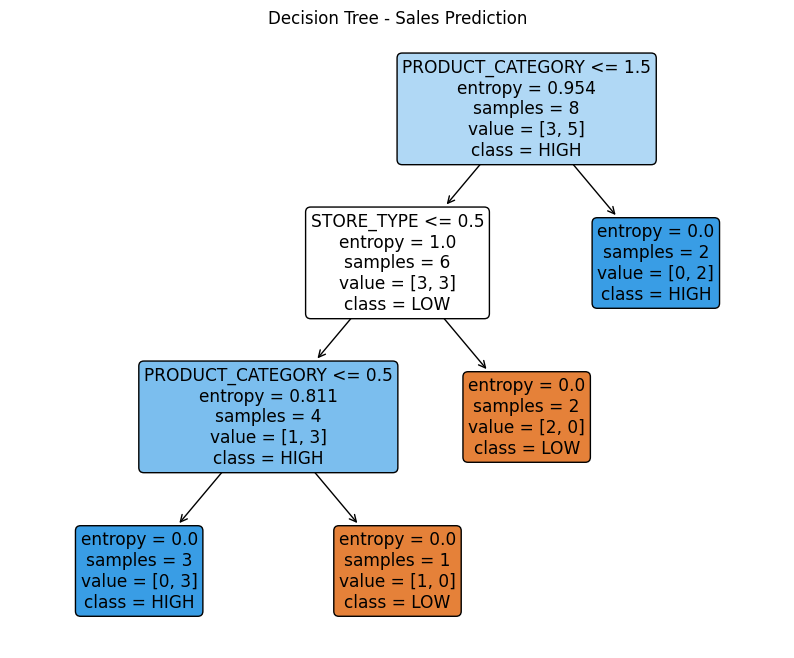

In [6]:
# Program 4 - Simple Decision Tree Classification Example

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Create the data
data = {
    'MARKETING_SPEND': [1500, 2300, 3200, 1800, 1200, 2500, 3500, 4000, 1700, 3000],
    'PRODUCT_CATEGORY': ['ELECTRONICS', 'CLOTHING', 'ELECTRONICS', 'CLOTHING', 'FURNITURE', 'ELECTRONICS', 'CLOTHING', 'FURNITURE', 'ELECTRONICS', 'CLOTHING'],
    'SEASON': ['HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR', 'HOLIDAY', 'REGULAR'],
    'STORE_TYPE': ['PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE', 'PHYSICAL', 'ONLINE'],
    'SALES': ['HIGH', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW']
}

df = pd.DataFrame(data)

# Step 2: Convert text to numbers using LabelEncoder
lbl_encoder = LabelEncoder()
df['PRODUCT_CATEGORY'] = lbl_encoder.fit_transform(df['PRODUCT_CATEGORY'])
df['SEASON'] = lbl_encoder.fit_transform(df['SEASON'])
df['STORE_TYPE'] = lbl_encoder.fit_transform(df['STORE_TYPE'])
df['SALES'] = lbl_encoder.fit_transform(df['SALES'])

# Step 3: Separate features (X) and target (y)
X = df.drop('SALES', axis=1)
y = df['SALES']

# Step 4: Split the data - 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Train the decision tree model
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
print(f"ACCURACY: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

# Step 7: Show the decision tree
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['LOW', 'HIGH'], rounded=True)
plt.title("Decision Tree - Sales Prediction")
plt.show()

In [21]:
# Program 6

import numpy as np


def step_function(x): return np.where(x >= 0, 1, 0)


class Perceptron:
    def __init__(self, size, lr=0.1, epochs=1000):
        self.w = np.zeros(size)
        self.b = 0
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, t in zip(X, y):
                pred = step_function(np.dot(xi, self.w) + self.b)
                e = t - pred
                self.w += self.lr * e * xi
                self.b += self.lr * e

    def predict(self, X):
        return step_function(np.dot(X, self.w) + self.b)

    def get_params(self): return self.w, self.b


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
p = Perceptron(2, 0.1, 1000)
p.train(X, y)
print("Predictions:", p.predict(X))
w, b = p.get_params()
print("Weights:", w)
print("Bias:", b)

Predictions: [1 1 0 0]
Weights: [-0.1  0. ]
Bias: 0.0


Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Feature Importances:
sepal length (cm): 0.1081
sepal width (cm): 0.0304
petal length (cm): 0.4400
petal width (cm): 0.4215


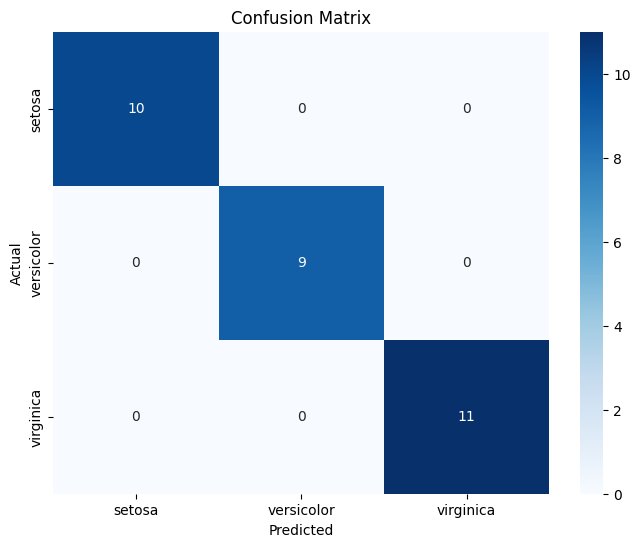

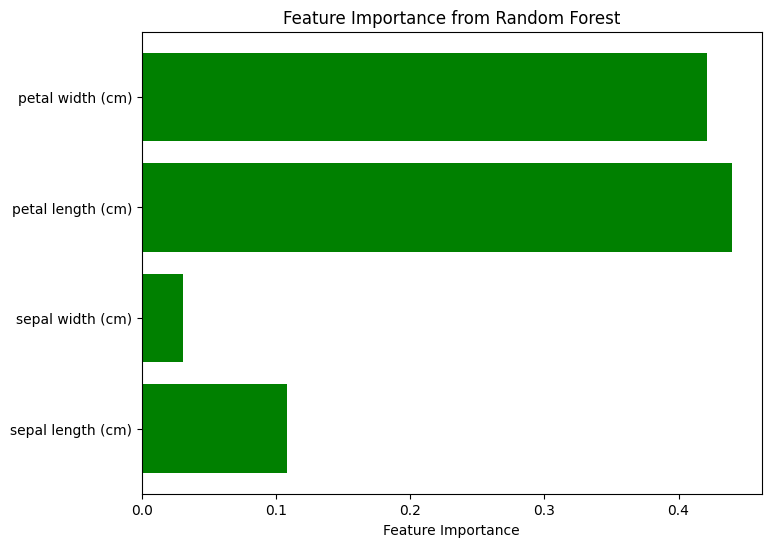

In [5]:
# Program 8(A) - Simple Random Forest on Iris Data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data  
y = iris.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

feature_importances = rf_clf.feature_importances_
print("\nFeature Importances:")

for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {feature_importances[i]:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances, color='green')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.5000
petal width (cm): 0.5000


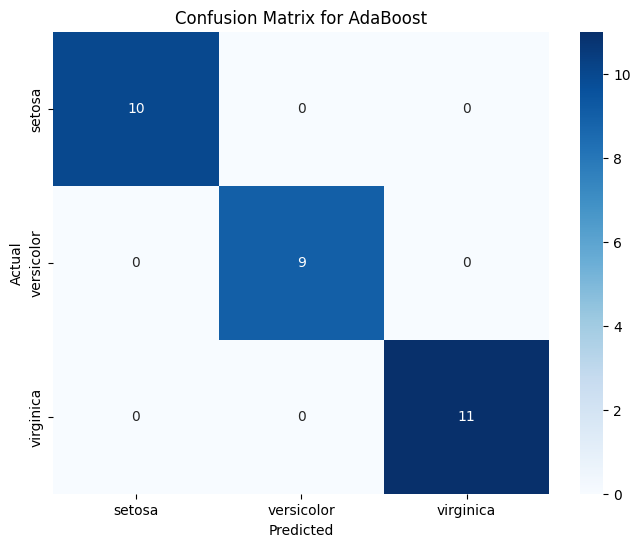

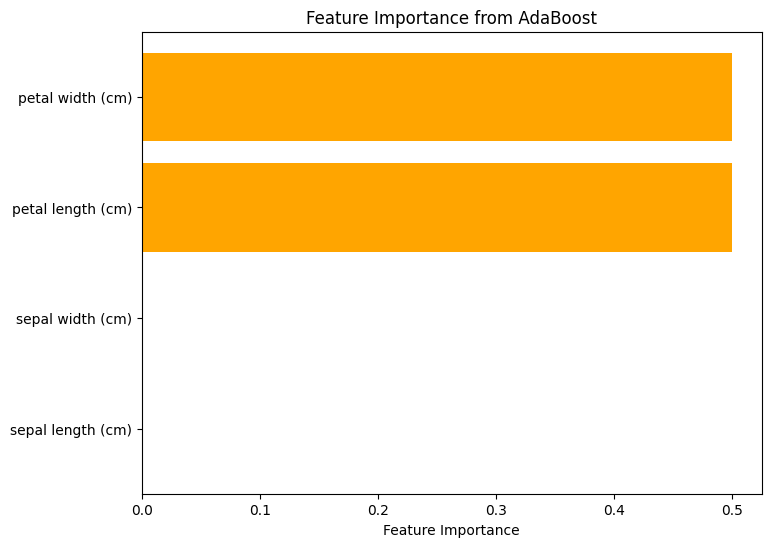

In [4]:
# Program 8(B)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data 
y = iris.target  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(cr)

feature_importances = ada_boost.feature_importances_

print("\nFeature Importances:")
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {feature_importances[i]:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances, color='orange')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from AdaBoost')
plt.show()

C:\Users\nanda\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'EM Algorithm')

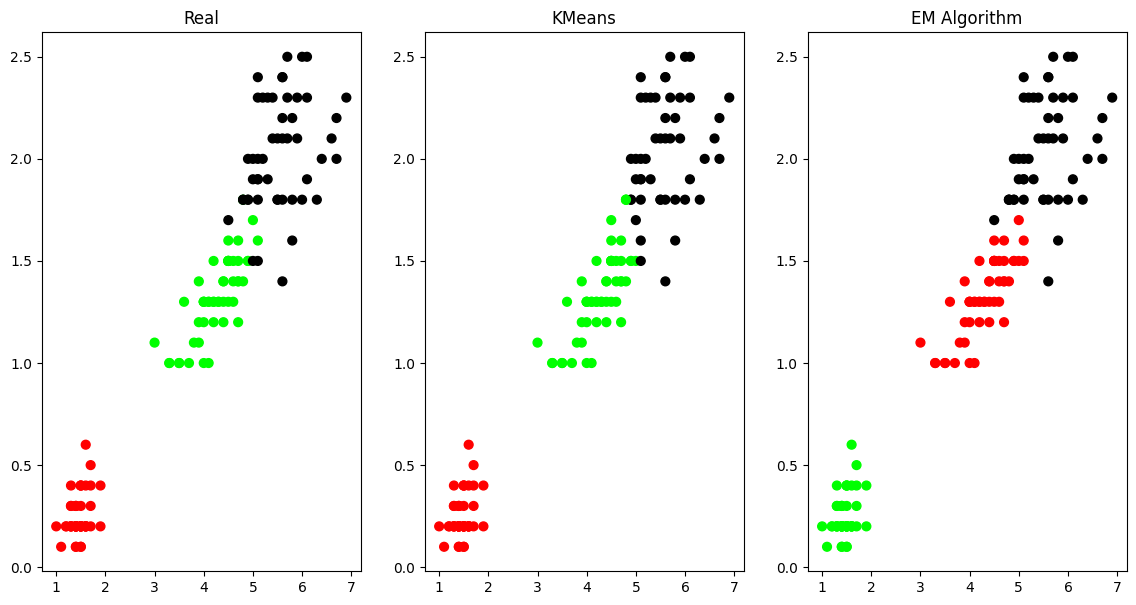

In [23]:
# Program 9
# Program to implement KMeans and EM Algorithm on Iris Dataset

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data[:, 2:]  # Petal Length, Petal Width
y = iris.target
colormap = np.array(['red', 'lime', 'black'])

plt.figure(figsize=(14, 7))

# Real plot
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y], s=40)
plt.title('Real')

# KMeans plot (with label reordering to match original)
plt.subplot(1, 3, 2)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
predY = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)  # Adjusted to match original
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY], s=40)
plt.title('KMeans')

# GMM plot
plt.subplot(1, 3, 3)
xs = StandardScaler().fit_transform(X)
gmm = GaussianMixture(n_components=3, random_state=0).fit(xs)
plt.scatter(X[:, 0], X[:, 1], c=colormap[gmm.predict(xs)], s=40)
plt.title('EM Algorithm')

In [25]:
# Program 10
# Program to implement KNN on Iris Dataset

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import datasets
iris = datasets.load_iris()

iris_data = iris.data

iris_labels = iris.target
print(iris_data)
print(iris_labels)
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_labels)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print("Confusion matrix is as follows")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Metrics")
print(classification_report(y_test, y_pred))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.